### Santiago García - Catalina Guatibonza

# PARCIAL 3 | MÉTODOS COMPUTACIONALES II

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

## 8. Modelo FitzHugh-Nagumo

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

In [21]:
D = 0.01
a = 0.2
b = 0.3
epsilon = 0.03
Nx = 50
Nt = 1000
x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

lambda_ = D * dt / dx**2

In [22]:
def ui(x):
    return np.random.rand(len(x)) * 0.3

def wi(x):
    return np.zeros(len(x))

In [23]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    
    u[0,:] = 0.1
    u[:,-1] = 0.2
    
    return u

u = InitT()

In [24]:
def GetSolution():
    
    for l in range(1,len(t)):
        
        for i in range(1,len(x)-1):
            
            u[l,i] = u[l-1,i] + lambda_*(u[l-1,i+1] - u[l-1,i-1])
            
GetSolution()

<IPython.core.display.Javascript object>


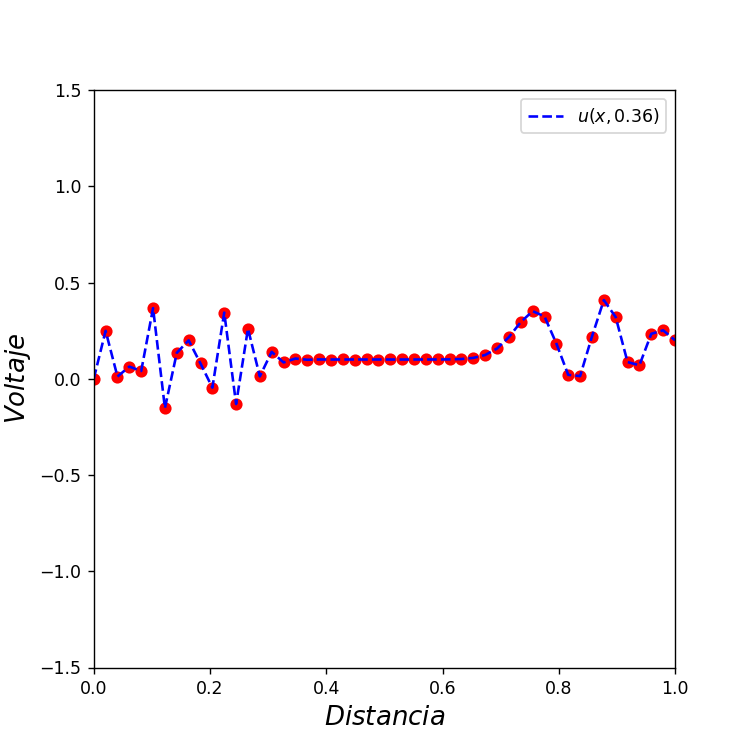

In [25]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1.5,1.5)
    ax.set_xlabel(r'$Distancia$', fontsize=15)
    ax.set_ylabel(r'$Voltaje$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

## 10. Ecuación de Burguers 2D

In [8]:
Nt = 500
Nx = 60
Ny = 60

In [9]:
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)

In [10]:
deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

In [11]:
valor_v = 0.3

In [12]:
lambda_ = (valor_v*deltat)/deltax**2
mu_ = (valor_v*deltat)/deltay**2

print(lambda_,mu_)

0.20927855711422957 0.20927855711422957


In [13]:
def Ti(x,y):
    return 5 * np.exp(-(x**2 + y**2))

In [14]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    T[:, 0, :] = 0
    T[:, -1, :] = 0
    T[:, :, 0] = 0
    T[:, :, -1] = 0
    
    return T

In [15]:
T = InitT()

In [16]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])

In [17]:
GetSolution()

100%|███████████████████████████████████████████████████████████████████████████████| 499/499 [00:02<00:00, 204.67it/s]


<IPython.core.display.Javascript object>


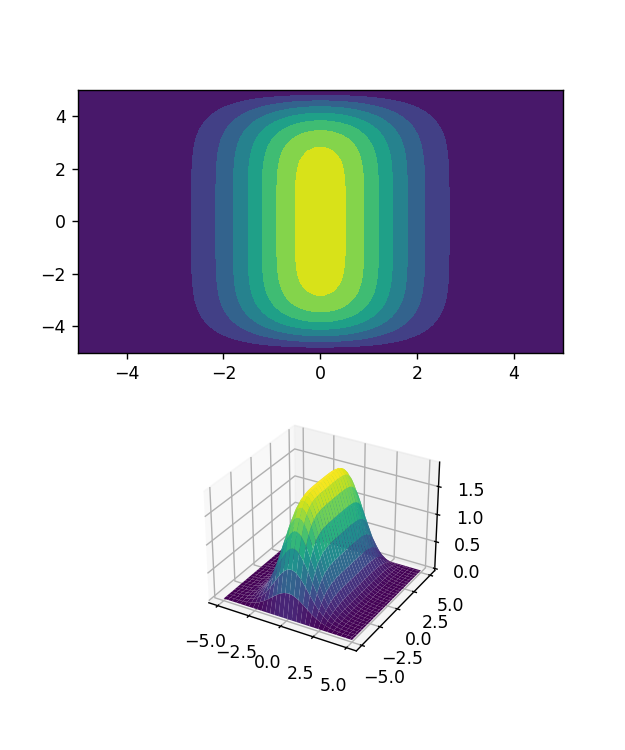

C:\Anaconda\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [18]:
fig = plt.figure(figsize=(5,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, projection='3d')

X,Y = np.meshgrid(x,y)

def init():

    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    ax2.set_zlim(0, 5)
    
def Update(i):

    ax1.clear()
    ax2.clear()
    init()
    
    ax1.contourf(X, Y, T[i,:,:])
    ax2.plot_surface(X, Y, T[i,:,:], cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)